![NYC](https://storage.googleapis.com/kaggle-datasets-images/268833/559075/cf825b5af1f904cd1ea6404039abc88e/dataset-cover.jpg?t=2019-07-18-19-19-53)


In [42]:
# !pip install folium

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [44]:
url = 'https://raw.githubusercontent.com/Pedro-Henrique300/praticando_analise_de_dados/main/Mapa_Hoteis_NYC/AB_NYC_2019.csv'

In [45]:
data = pd.read_csv(url)

In [46]:
data.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [47]:
data.dropna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [48]:
data.drop(['id'], axis=1, inplace=True)

In [49]:
data.dropna(inplace=True)

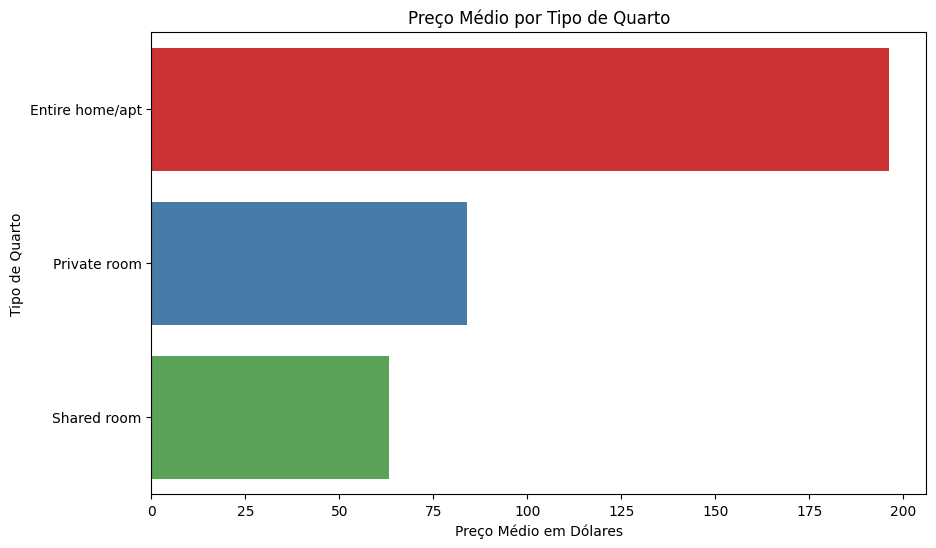

In [56]:
# Agrupe os dados por 'room_type' e calcule a média de 'price' para cada grupo
room_type_price = data.groupby('room_type')['price'].mean().reset_index()

# Crie o gráfico de colunas
plt.figure(figsize=(10, 6))  # Define o tamanho do gráfico
sns.barplot(x='price', y='room_type', data=room_type_price, palette='Set1')
plt.xlabel('Preço Médio em Dólares')
plt.ylabel('Tipo de Quarto')
plt.title('Preço Médio por Tipo de Quarto')

plt.show()

In [51]:
room_type_price.head()

,room_type,price
0,Entire home/apt,196.315929
1,Private room,83.985272
2,Shared room,63.213948


In [52]:
# Certifique-se de que 'price', 'latitude', e 'longitude' sejam do tipo numérico
data['price'] = pd.to_numeric(data['price'])
data['latitude'] = pd.to_numeric(data['latitude'])
data['longitude'] = pd.to_numeric(data['longitude'])

# Agrupe os dados por 'neighbourhood_group' e calcule a média de 'price' para cada grupo
region_avg_price = data.groupby('neighbourhood_group')['price'].mean().reset_index()

# Crie um mapa Folium
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)  # Define a localização e o nível de zoom inicial

# Crie marcadores no mapa para cada região
marker_cluster = MarkerCluster().add_to(m)
for index, row in region_avg_price.iterrows():
    region = row['neighbourhood_group']
    price = row['price']

    # Obtenha a latitude e longitude média para a região
    region_data = data[data['neighbourhood_group'] == region]
    avg_lat = region_data['latitude'].mean()
    avg_lon = region_data['longitude'].mean()

    # Escolha uma cor com base no preço médio (você pode personalizar isso)
    color = 'green' if price < 100 else 'orange' if price < 200 else 'red'

    # Crie um marcador para cada região
    folium.Marker(
        location=[avg_lat, avg_lon],
        icon=folium.Icon(color=color),
        tooltip=f'Região: {region}<br>Preço Médio: ${price:.2f}'
    ).add_to(marker_cluster)

In [53]:
display(m)

In [55]:
# Para salvar
m.save("regioes_mapa_interativo.html")